In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("BDOShoham.csv").dropna()
df

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [3]:
df.describe()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,2.168595e-19,3.388430e-21,0.0,6.661925e-16,1.387901e-17,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


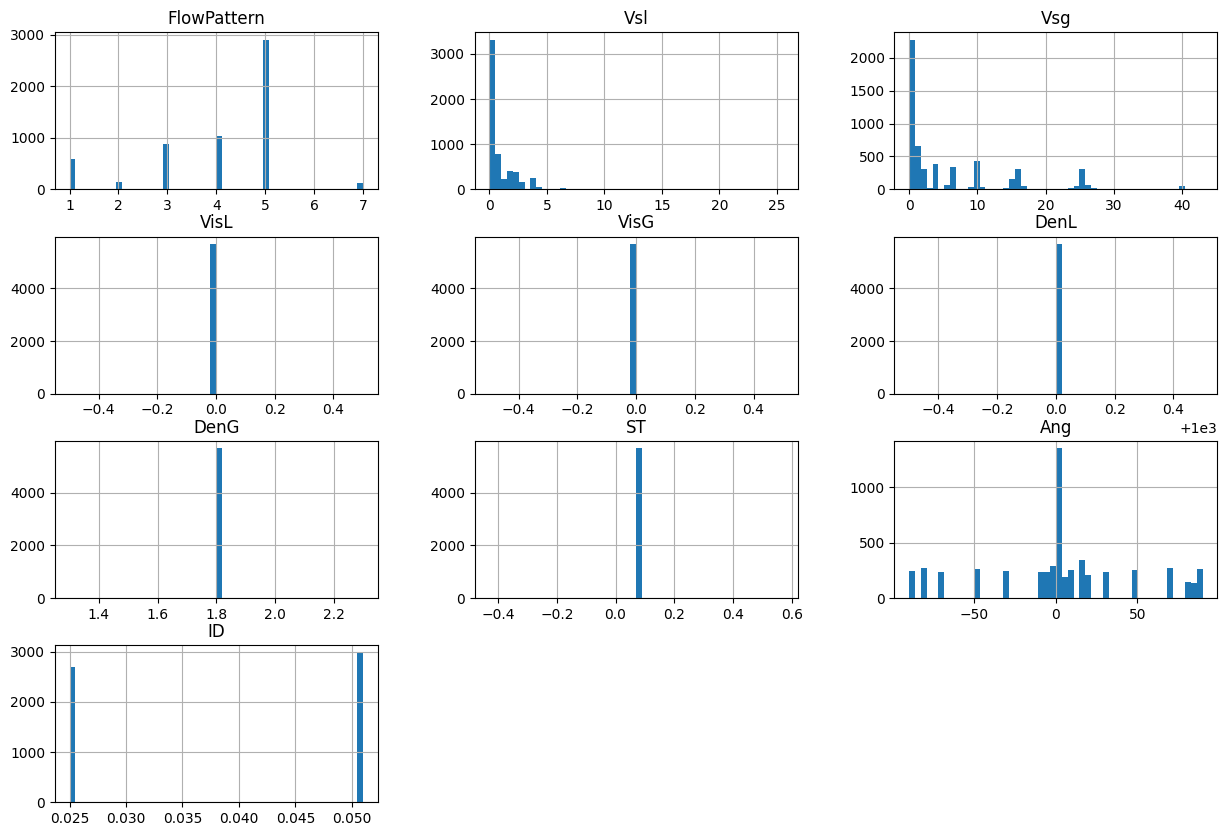

In [4]:
df.hist(figsize=(15, 10), bins=50)

plt.show()

In [5]:
X_names = ["Vsl", "Vsg", "Ang"]
y_name = "FlowPattern"

X = df[X_names]
y = df[y_name]

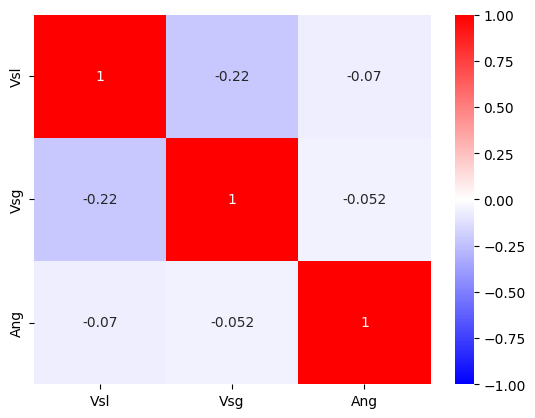

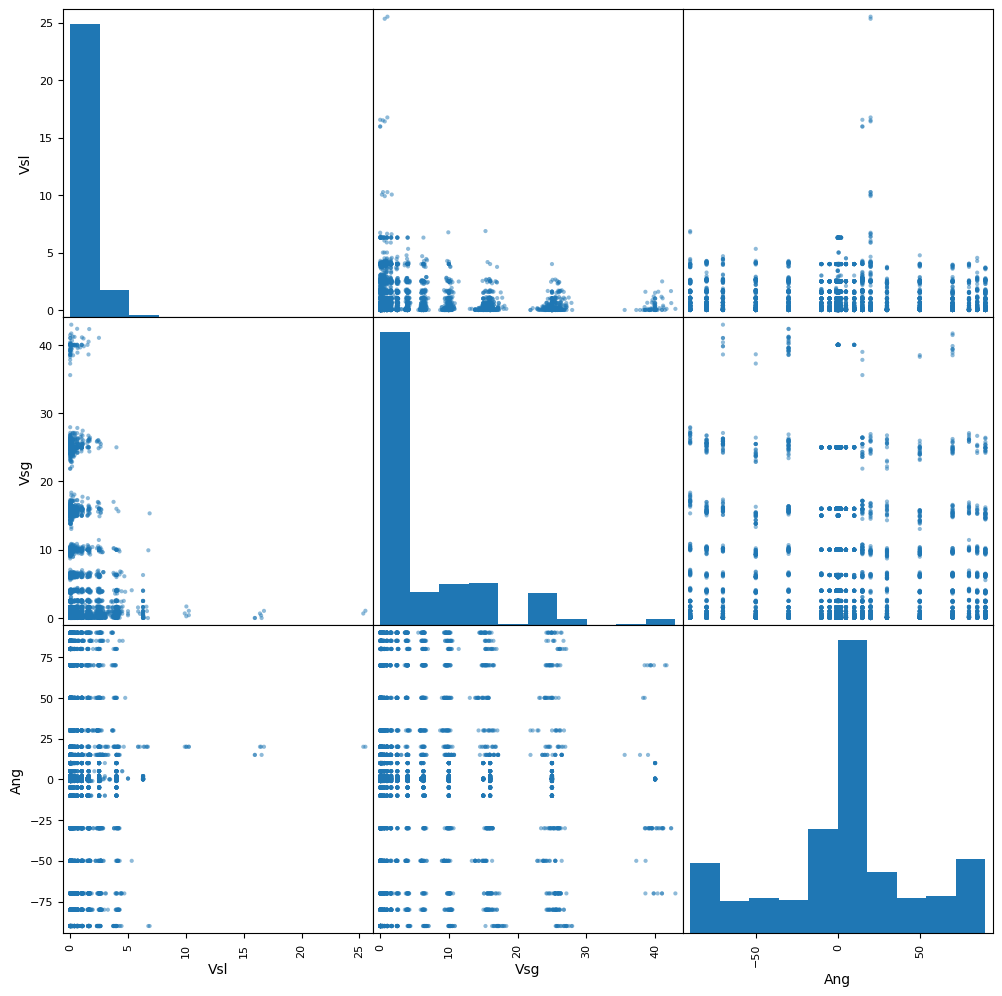

In [6]:
corr = X.corr()

sns.heatmap(corr, cmap="bwr", vmin=-1, vmax=1, annot=True)

plt.show()

pd.plotting.scatter_matrix(X, figsize=(12, 12))

plt.show()

In [7]:
test_pct = 0.20
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_pct, random_state=seed
)

In [8]:
models = [
    ("LR", LogisticRegression(multi_class="multinomial", max_iter=1000)),
    ("Ridge", RidgeClassifier(alpha=10)),
    (
        "KNN",
        KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    ),
]

In [9]:
# sklearn.metrics.get_scorer_names()

In [21]:
from itertools import product

from sklearn.model_selection import cross_validate

scoring = [
    "accuracy",
    "recall_macro",
    "f1_macro",
    # "precision_macro",
    "recall_micro",
    "f1_micro",
    "precision_micro",
]
k4folds = 5
results = []
names = []

for model_name, model in models:
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)

    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=10)

    for key, val in cv_results.items():
        print(model_name, key, val.mean(), val.std())

# for scoring_method, (name, model) in product(scoring, models):
#     print(f" ++ NOW WORKING ON ALGORITHM {name} ++")
#     print(f"Splitting data into {k4folds} folds")
#     print("Training model on each split")
#     cv_results = model_selection.cross_val_score(
#         model,
#         X_train,
#         y_train,
#         cv=kfold,
#         scoring=scoring_method,
#         n_jobs=5,
#     )

#     msg = f"algorithm {name} {scoring_method} results: mean = {cv_results.mean():.3f} (std = {cv_results.std():.3f})"
#     print(msg, end="\n\n")

#     results.append((name, scoring_method, cv_results))
# print("done.")

LR fit_time 0.36749701499938964 0.10452846533496271
LR score_time 0.0051425457000732425 0.0016028762632820687
LR test_accuracy 0.6680616740088106 0.010368812595541706
LR test_recall_macro 0.48075188754242804 0.020201305286139275
LR test_f1_macro 0.4927474626665346 0.012436287830417371
LR test_recall_micro 0.6680616740088106 0.010368812595541706
LR test_f1_micro 0.6680616740088106 0.010368812595541706
LR test_precision_micro 0.6680616740088106 0.010368812595541706
Ridge fit_time 0.0037419795989990234 0.0006594046221628969
Ridge score_time 0.005222177505493164 0.0016174586424283117
Ridge test_accuracy 0.608590308370044 0.010084161358819028
Ridge test_recall_macro 0.2948511506557127 0.005534578068255862
Ridge test_f1_macro 0.28185690745797964 0.008129144069364047
Ridge test_recall_micro 0.608590308370044 0.010084161358819028
Ridge test_f1_micro 0.608590308370044 0.010084161358819028
Ridge test_precision_micro 0.608590308370044 0.010084161358819028
KNN fit_time 0.002151298522949219 0.00046

In [11]:
for name, scoring_method, res in results:
    fig = plt.figure()
    fig.suptitle(f"Algorithm Comparison based on {name}, {scoring_method=}")
    ax = fig.add_subplot(111)
    plt.boxplot(res)
    ax.set_xticklabels(names)
    plt.show()

Best parameters set found on development set:
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Grid scores on development set:
0.869 (+/-0.0118) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.869 (+/-0.0118) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.870 (+/-0.0101) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.870 (+/-0.0101) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.856 (+/-0.00702) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.862 (+/-0.00821) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.855 (+/-0.00615) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.863 (+/-0.00761) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.842 (+/-0.00677) for {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.860 (+/-0.00677) for {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.843 (+/-0.00932) for {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.858 (+/-0.00719) for {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.827 (

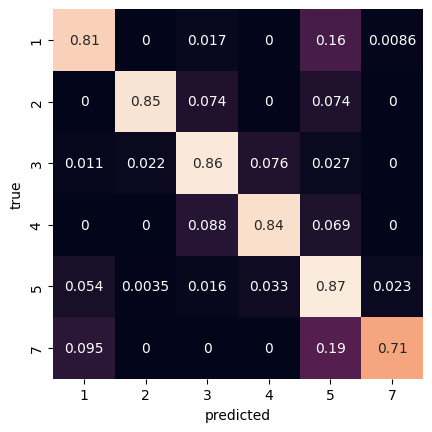

Cohen Kappa Score: 0.7875455340602144
done.


In [12]:
selected_model = KNeighborsClassifier()

parameters = {
    "n_neighbors": range(1, 20, 2),
    "weights": ("uniform", "distance"),
    "p": (1, 2),
}

clf = GridSearchCV(selected_model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")

means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print(f"{mean:0.03f} (+/-{std:0.03}) for {params}")


y_true, y_pred = y_test, clf.predict(X_test)

print("Detailed classification report:")
print(classification_report(y_true, y_pred))

df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, normalize="true"),
    columns=np.unique(y_test),
    index=np.unique(y_test),
)

sns.heatmap(
    df_cm,
    square=True,
    annot=True,
    # fmt="d",
    cbar=False,
)
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))

print("done.")

## Discussion

During the initial cross validation step, the kNN classifier consistently performed better than the LogisticRegression or Ridge classifiers regardless of scoring metric used.

The kNN performed the task of predicting the FlowPattern class most reliably with the following hyperparameter configuration:
```
n_neighbors = 1
weights = 'uniform'
p = 2
```

The final accuracy of the trained kNN classifier is 0.85, with a Cohen's Kappa of ~0.79.
Since not all FlowPatterns were represented in the dataset with equal statistics, I normalized the final confusion matrix to the number of True FlowPatterns.
The least performant classification occurred when attempting to predict FlowPattern 7, where 19% of the samples were misclassified as FlowPattern 5, and another 9.5% as FlowPattern 1.